In [22]:
from pandas import read_csv
from pandas.plotting import register_matplotlib_converters
from matplotlib.pyplot import subplots, savefig, show
from ds_charts import get_variable_types, HEIGHT
from matplotlib.pyplot import figure, savefig, show, title
from seaborn import heatmap

In [23]:
register_matplotlib_converters()
filename = "data/set2_air_quality_tabular.csv"
data = read_csv(filename, parse_dates=['date'], infer_datetime_format=True)
data

,date,FID,City_EN,Prov_EN,GbCity,GbProv,Field_1,ALARM,CO_Mean,CO_Min,...,PM2.5_Max,PM2.5_Std,PM10_Mean,PM10_Min,PM10_Max,PM10_Std,SO2_Mean,SO2_Min,SO2_Max,SO2_Std
0,2020-01-01,0,Beijing,Beijing,1100,11,24.0,Safe,0.792917,0.60,...,48.0,7.618394,55.000000,38.0,86.0,14.044572,6.708333,3.0,12.0,2.440614
1,2020-01-01,1,Tianjin,Tianjin,1200,12,245.0,Safe,1.157083,0.71,...,78.0,12.203995,94.500000,64.0,123.0,17.327723,14.208333,9.0,20.0,3.054766
2,2020-01-01,2,Shijiazhuang,Hebei,1301,13,228.0,Safe,1.489167,1.17,...,95.0,13.515423,135.166667,114.0,168.0,15.249772,26.208333,22.0,33.0,2.676739
3,2020-01-01,3,Tangshan,Hebei,1302,13,244.0,Safe,1.882083,1.10,...,104.0,18.350324,133.458333,91.0,192.0,30.202068,35.208333,17.0,91.0,18.009209
4,2020-01-01,4,Qinhuangdao,Hebei,1303,13,201.0,Safe,1.389583,0.78,...,64.0,9.945686,74.416667,51.0,123.0,18.511070,25.416667,15.0,44.0,5.596998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169268,2021-03-24,530800,Puer,Yunnan,530800,53,NaN,Safe,0.575000,0.40,...,48.0,13.438065,45.666667,6.0,87.0,27.025708,4.250000,3.0,20.0,3.319764
169269,2021-03-24,640500,Zhongwei,Ningxia,640500,64,NaN,Danger,0.389583,0.15,...,73.0,11.246913,155.375000,118.0,241.0,36.133794,11.375000,5.0,23.0,5.368213
169270,2021-03-24,652801,Kuerle,Xinjiang,652801,65,NaN,Safe,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169271,2021-03-24,659001,Shihezi,Xinjiang,659001,65,NaN,Danger,0.639583,0.40,...,56.0,18.743703,154.083333,34.0,323.0,97.537137,7.208333,5.0,11.0,1.471370


In [24]:
initial_date = data['date'].iloc[0]
data['ALARM'] = data['ALARM'].astype('category').cat.codes
data['date'] = (data['date'] - initial_date).dt.days
data

,date,FID,City_EN,Prov_EN,GbCity,GbProv,Field_1,ALARM,CO_Mean,CO_Min,...,PM2.5_Max,PM2.5_Std,PM10_Mean,PM10_Min,PM10_Max,PM10_Std,SO2_Mean,SO2_Min,SO2_Max,SO2_Std
0,0,0,Beijing,Beijing,1100,11,24.0,1,0.792917,0.60,...,48.0,7.618394,55.000000,38.0,86.0,14.044572,6.708333,3.0,12.0,2.440614
1,0,1,Tianjin,Tianjin,1200,12,245.0,1,1.157083,0.71,...,78.0,12.203995,94.500000,64.0,123.0,17.327723,14.208333,9.0,20.0,3.054766
2,0,2,Shijiazhuang,Hebei,1301,13,228.0,1,1.489167,1.17,...,95.0,13.515423,135.166667,114.0,168.0,15.249772,26.208333,22.0,33.0,2.676739
3,0,3,Tangshan,Hebei,1302,13,244.0,1,1.882083,1.10,...,104.0,18.350324,133.458333,91.0,192.0,30.202068,35.208333,17.0,91.0,18.009209
4,0,4,Qinhuangdao,Hebei,1303,13,201.0,1,1.389583,0.78,...,64.0,9.945686,74.416667,51.0,123.0,18.511070,25.416667,15.0,44.0,5.596998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
169268,448,530800,Puer,Yunnan,530800,53,NaN,1,0.575000,0.40,...,48.0,13.438065,45.666667,6.0,87.0,27.025708,4.250000,3.0,20.0,3.319764
169269,448,640500,Zhongwei,Ningxia,640500,64,NaN,0,0.389583,0.15,...,73.0,11.246913,155.375000,118.0,241.0,36.133794,11.375000,5.0,23.0,5.368213
169270,448,652801,Kuerle,Xinjiang,652801,65,NaN,1,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
169271,448,659001,Shihezi,Xinjiang,659001,65,NaN,0,0.639583,0.40,...,56.0,18.743703,154.083333,34.0,323.0,97.537137,7.208333,5.0,11.0,1.471370


In [25]:
data.drop(columns=['FID','GbProv','Field_1'], inplace=True)
corr_mtx = data.corr()
corr_mtx

,date,ALARM,CO_Mean,CO_Min,CO_Max,CO_Std,NO2_Mean,NO2_Min,NO2_Max,NO2_Std,...,PM2.5_Max,PM2.5_Std,PM10_Mean,PM10_Min,PM10_Max,PM10_Std,SO2_Mean,SO2_Min,SO2_Max,SO2_Std
date,1.000000,-0.073129,0.074306,0.045725,0.068772,0.057839,0.160569,0.153262,0.131555,0.085707,...,0.082444,0.063589,0.099291,0.102826,0.077725,0.059611,0.056959,0.053523,0.037697,0.032404
ALARM,-0.073129,1.000000,-0.468988,-0.402998,-0.358219,-0.246438,-0.407320,-0.424370,-0.326786,-0.187747,...,-0.540872,-0.408590,-0.510505,-0.527679,-0.416412,-0.310602,-0.252031,-0.258115,-0.158751,-0.135813
CO_Mean,0.074306,-0.468988,1.000000,0.819696,0.845236,0.654005,0.558526,0.559891,0.436260,0.252799,...,0.446444,0.317137,0.308396,0.382517,0.186977,0.097855,0.455780,0.424707,0.312465,0.281773
CO_Min,0.045725,-0.402998,0.819696,1.000000,0.498204,0.175580,0.425825,0.554032,0.267329,0.042489,...,0.344278,0.169679,0.233806,0.359220,0.103594,0.011781,0.275059,0.342267,0.141402,0.104353
CO_Max,0.068772,-0.358219,0.845236,0.498204,1.000000,0.902921,0.467998,0.390676,0.431041,0.333615,...,0.379420,0.311767,0.262972,0.287146,0.192737,0.128972,0.444102,0.350219,0.363819,0.345437
CO_Std,0.057839,-0.246438,0.654005,0.175580,0.902921,1.000000,0.345569,0.218396,0.355833,0.339445,...,0.287052,0.286903,0.197695,0.175679,0.168096,0.137067,0.367265,0.245969,0.320519,0.318563
NO2_Mean,0.160569,-0.407320,0.558526,0.425825,0.467998,0.345569,1.000000,0.856600,0.893928,0.680525,...,0.385497,0.260185,0.342537,0.437701,0.204615,0.101891,0.419125,0.411210,0.272877,0.240566
NO2_Min,0.153262,-0.424370,0.559891,0.554032,0.390676,0.218396,0.856600,1.000000,0.635782,0.272795,...,0.360240,0.198933,0.298689,0.427305,0.155952,0.051583,0.339176,0.406533,0.177021,0.134890
NO2_Max,0.131555,-0.326786,0.436260,0.267329,0.431041,0.355833,0.893928,0.635782,1.000000,0.893762,...,0.345517,0.260805,0.320529,0.378001,0.222657,0.135492,0.372973,0.331993,0.276279,0.253097
NO2_Std,0.085707,-0.187747,0.252799,0.042489,0.333615,0.339445,0.680525,0.272795,0.893762,1.000000,...,0.242688,0.229037,0.244755,0.247726,0.195350,0.144563,0.292744,0.202908,0.251959,0.249182


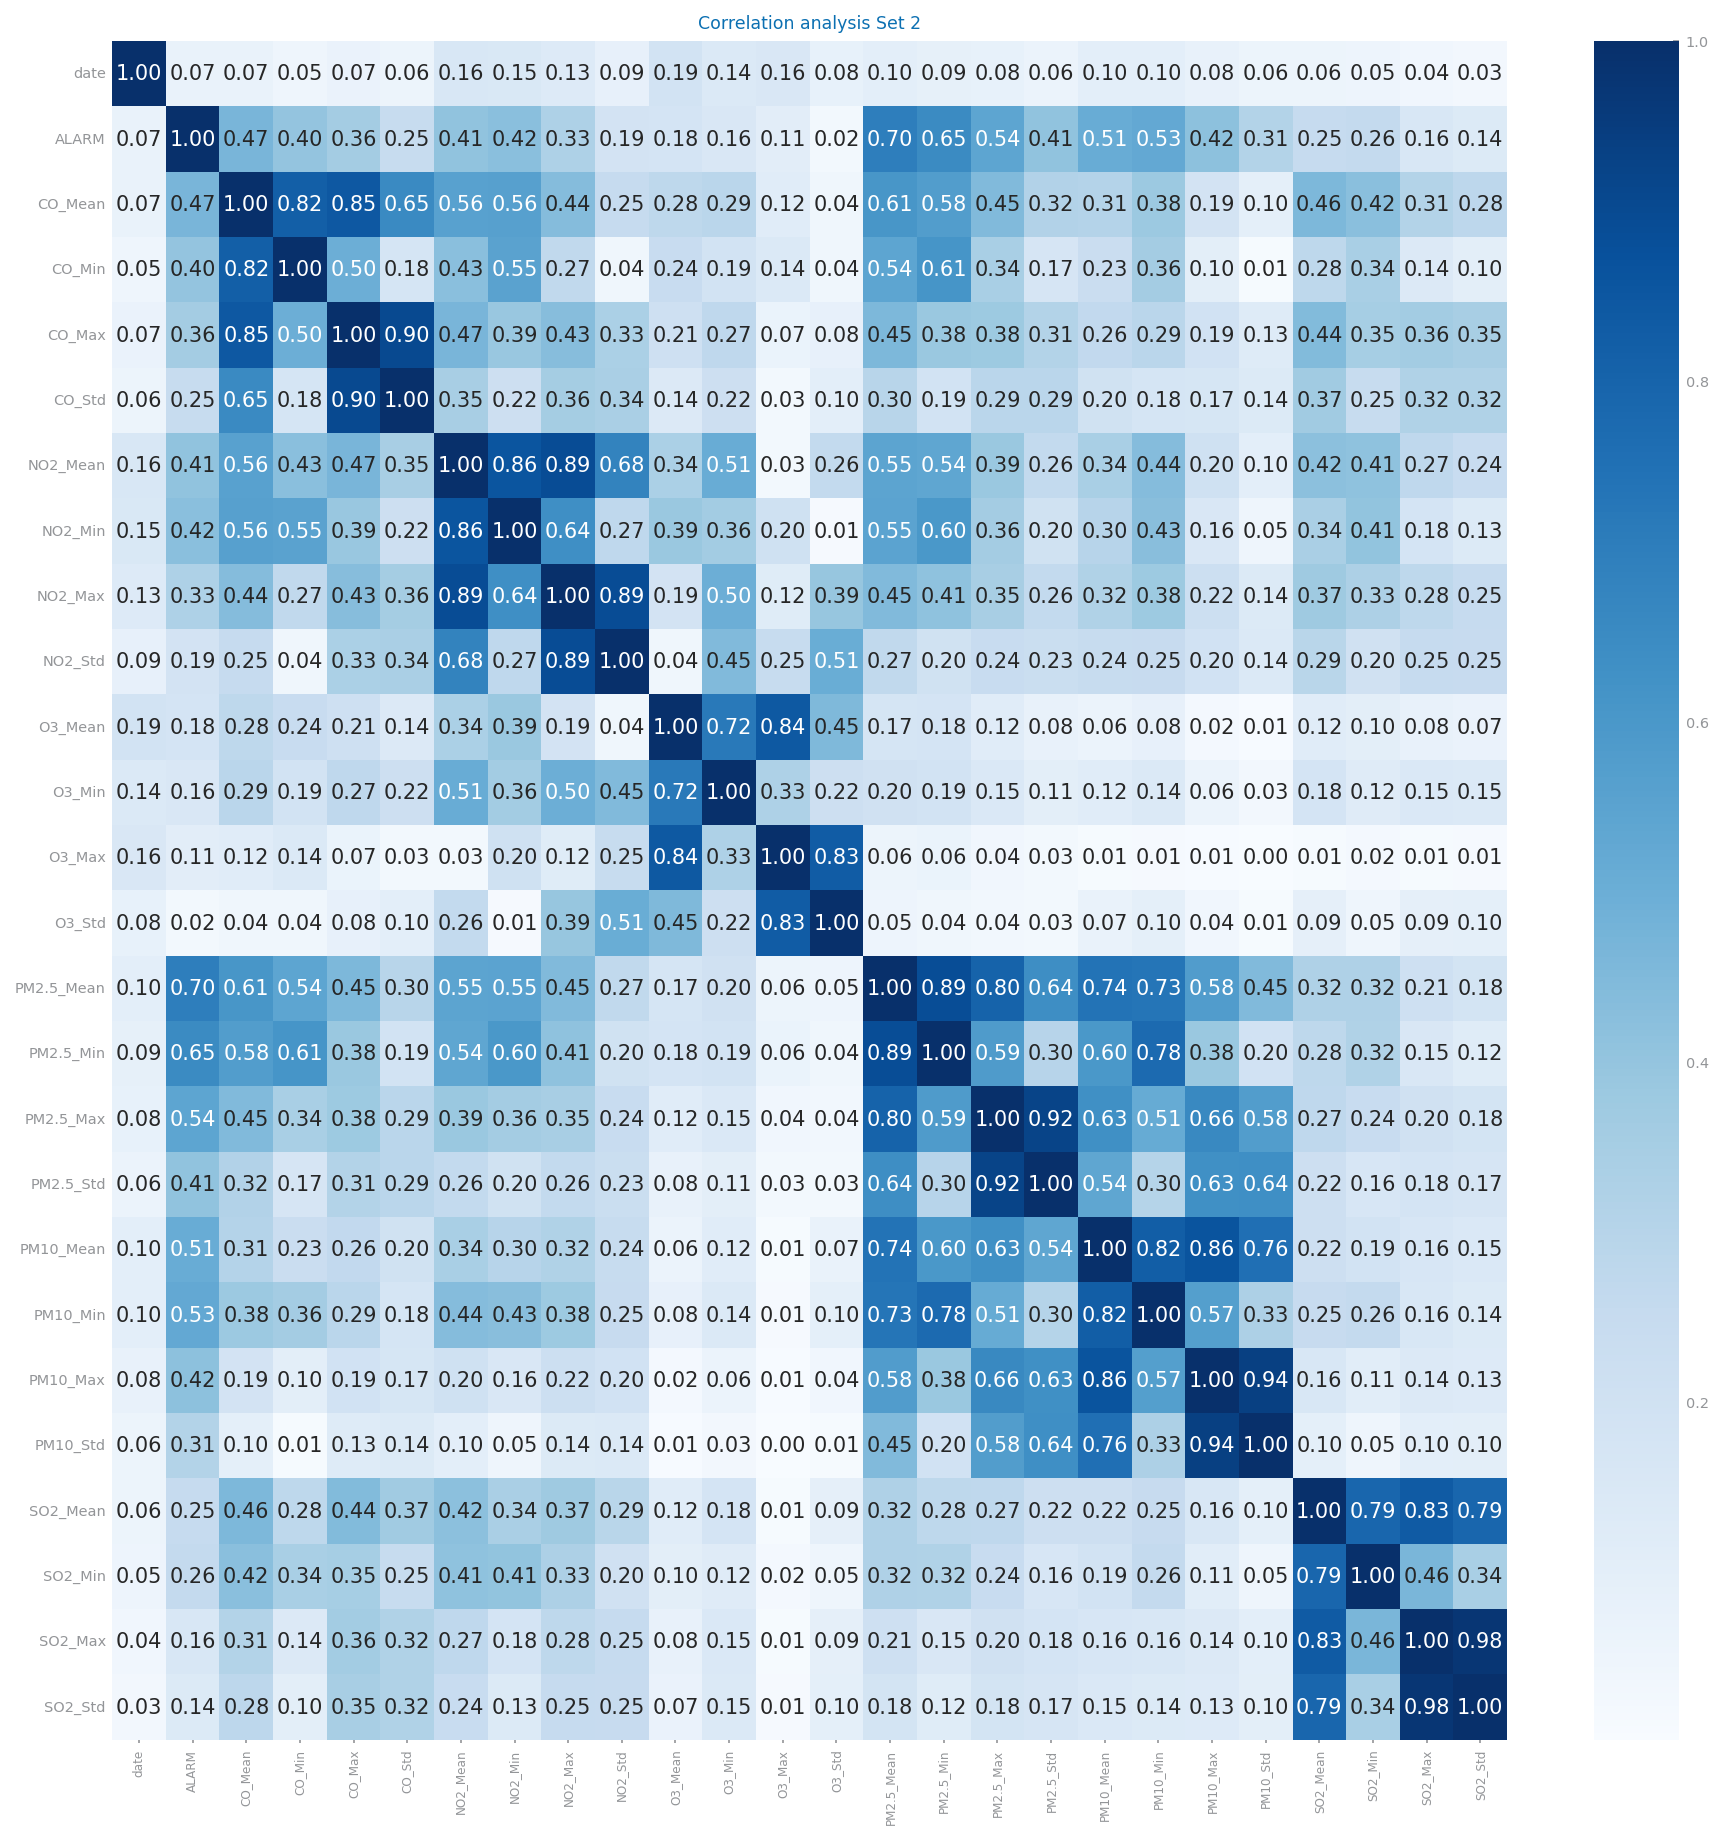

In [26]:
fig = figure(figsize=[15, 15])
fig.patch.set_facecolor('white')
heatmap(abs(corr_mtx), xticklabels=corr_mtx.columns, yticklabels=corr_mtx.columns, annot=True, cmap='Blues', fmt='.2f')
title('Correlation analysis Set 2')
savefig(f'images/set2/correlation_analysis_set2.png')
show()

In [27]:

correlations = []
for row in corr_mtx.index.values:
    for column in corr_mtx.columns:
        mod_r = corr_mtx.loc[row][column]
        if row != column and corr_mtx.loc[row][column] > 0.7:
            correlations.append((row, column, round(mod_r, 2)))
correlations.sort(key=lambda x:x[2])
for correlation in correlations:
    row = correlation[0]
    column = correlation[1]
    mod_r = correlation[2]
    print("(" + row + ", " + column + ", |r| = " + str(mod_r) +"), ", end="")

(O3_Mean, O3_Min, |r| = 0.72), (O3_Min, O3_Mean, |r| = 0.72), (PM2.5_Mean, PM10_Min, |r| = 0.73), (PM10_Min, PM2.5_Mean, |r| = 0.73), (PM2.5_Mean, PM10_Mean, |r| = 0.74), (PM10_Mean, PM2.5_Mean, |r| = 0.74), (PM10_Mean, PM10_Std, |r| = 0.76), (PM10_Std, PM10_Mean, |r| = 0.76), (PM2.5_Min, PM10_Min, |r| = 0.78), (PM10_Min, PM2.5_Min, |r| = 0.78), (SO2_Mean, SO2_Min, |r| = 0.79), (SO2_Mean, SO2_Std, |r| = 0.79), (SO2_Min, SO2_Mean, |r| = 0.79), (SO2_Std, SO2_Mean, |r| = 0.79), (PM2.5_Mean, PM2.5_Max, |r| = 0.8), (PM2.5_Max, PM2.5_Mean, |r| = 0.8), (CO_Mean, CO_Min, |r| = 0.82), (CO_Min, CO_Mean, |r| = 0.82), (PM10_Mean, PM10_Min, |r| = 0.82), (PM10_Min, PM10_Mean, |r| = 0.82), (O3_Max, O3_Std, |r| = 0.83), (O3_Std, O3_Max, |r| = 0.83), (SO2_Mean, SO2_Max, |r| = 0.83), (SO2_Max, SO2_Mean, |r| = 0.83), (O3_Mean, O3_Max, |r| = 0.84), (O3_Max, O3_Mean, |r| = 0.84), (CO_Mean, CO_Max, |r| = 0.85), (CO_Max, CO_Mean, |r| = 0.85), (NO2_Mean, NO2_Min, |r| = 0.86), (NO2_Min, NO2_Mean, |r| = 0.86), 